# HW3: PCA & NMF

## Principal Components Analysis (PCA)

Your task is to implement PCA on the `20newsgroups` dataset.

- We provide code below that uses [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to convert each document in the dataset into a vector of features (**1. Data**).

- You will then use scikit learn's PCA implementation on these features (**2. PCA**).

- Finally, you'll visualize the reduced data points (**3. Visualizing the reduced data points**) and the principal components (**4. Visualizing the  components**).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data (0 points)

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 
                'rec.motorcycles', 
                'sci.med', 
                'soc.religion.christian']
)

In [3]:

tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).todense()
X = X - X.mean(0)

y = newsgroups_train.target

In [4]:
# Show an example (item 0 in the dataset)
print(newsgroups_train.data[0])
print("tf-idf representation:", X[0], X[0].shape)
print("class:", y[0], "(%s)" % newsgroups_train.target_names[y[0]])

From: jgd@dixie.com (John De Armond)
Subject: Re: Do we need a Radiologist to read an Ultrasound?
Organization: Dixie Communications Public Access.  The Mouth of the South.
Lines: 28

E.J. Draper <draper@odin.mda.uth.tmc.edu> writes:

>If it were my wife, I would insist that a radiologist be involved in the
>process.  Radiologist are intensively trained in the process of
>interpreting diagnostic imaging data and are aware of many things that
>other physicians aren't aware of.  

Maybe, maybe not.  A new graduate would obviously be well trained (but
perhaps without sufficient experience). A radiologist trained 10 or
15 years ago who has not kept his continuing education current is a 
whole 'nuther matter.  A OB who HAS trained in modern radiology technology
is certainly more qualified than the latter and at least equal to 
the former.

>Would you want a radiologist to
>deliver your baby?  If you wouldn't, then why would you want a OB/GYN to
>read your ultrasound study?

If the radiologi

## 2. PCA - Principal Components Analysis (5 points)

Use `q = 4` (where `q` is the number of components, as in the lecture notes)

In [5]:
q = 4
random_seed = 123

In [6]:
# <TODO> import the proper class
# ...
from sklearn.decomposition import PCA
# <TODO> initialize the PCA model.
pca = PCA(n_components = q,random_state = random_seed)

# <TODO> train the PCA model and retrieve the low-dimensional projection of X.
Z = pca.fit_transform(X,y)


# <TODO> retrieve the explained variance ratio.
var_ratio = pca.explained_variance_ratio_ 

In [7]:
# You should get around (there may be very small variations between runs): 
#      [0.03080441 0.01712901 0.01155379 0.00999028]

print('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [0.03080441 0.01712901 0.0115538  0.00999027]


In [8]:
# You should get:
#      Original Shape:  (2369, 1771)
#      Reduced Shape:  (2369, 4)

print('Original Shape: ', X.shape)
print('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1771)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points (2 points)

Below you will visualize the **first two dimensions** of the reduced data.

**_Question_: Based on the visualization, which class has a noticeably different low-dimensional representation?**  Refer to `newsgroups_train.target_names` to interpret the integer class label.

**_Your answer here_:** The "sci.med" class has a noticeably different low-dimensional representation. The other 3 classes have their data mostly stacked on top of each other in a horizontal cluster just above the x axis, centered approximately at $x=0$. The data points for sci.med,however, are scattered in a much larger area extending vertically from $y=0$ to $y=0.8$.

['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian']


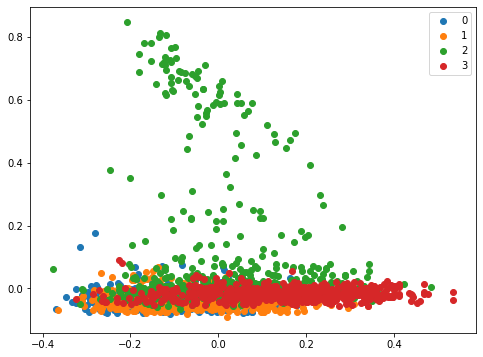

In [9]:
# <TODO> Select the dimensions to visualize
print(newsgroups_train.target_names)
x_axis_data = Z[:,0]
y_axis_data = Z[:,1]

# Visualize (you should not need to modify this.)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    x_ = x_axis_data[y == label]
    y_ = y_axis_data[y == label]
    plt.scatter(x_, y_, label=label)
plt.legend();

## 4. Visualizing the principal components (3 points)

We will 'visualize' each principal component by printing its highest-weighted tokens.

In [10]:
# <TODO> uncomment below. Retrieve W
W = pca.components_

In [11]:
#subroutine to print out the top n tokens, given indices sorted by weight
idx_to_token = {
    idx: token 
    for token, idx in tfidf_vectorizer.vocabulary_.items()
}
def print_tokens(sorted_idx,n):
    for j in range(n):
        print("%d. %s\n"%(j+1,idx_to_token[sorted_idx[-1-j]]))
   

In [12]:
# For each component...
for i in range(q):
    sorted_idxs = np.argsort(W[i])
    print('--- Component %d' % i)
    # print out the tokens with the top-10 highest weights 
    #for this component.
    print_tokens(sorted_idxs,10)

--- Component 0
1. the

2. of

3. that

4. to

5. and

6. is

7. god

8. in

9. we

10. not

--- Component 1
1. pitt

2. geb

3. banks

4. gordon

5. cs

6. cadre

7. dsl

8. shameful

9. n3jxp

10. chastity

--- Component 2
1. god

2. we

3. he

4. jesus

5. his

6. that

7. faith

8. christians

9. hell

10. not

--- Component 3
1. the

2. edu

3. mac

4. of

5. university

6. god

7. ai

8. apple

9. georgia

10. uga



## Non-negative Matrix Factorization (NMF) (10 points)

Now your task is to use NMF:
- Use the `sklearn.decomposition.NMF` class to find a low-dimensional representation of the data
- Print out the 10 highest-weighted tokens according to each row of the weight matrix `W`

_The overall pattern should be similar to steps (2) and (4) that you did above._

Use `q=10`:

In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).todense()
q = 10

In [14]:
#initialize, fit the NMF to our data X
from sklearn.decomposition import NMF
nmf = NMF(n_components = q,random_state = random_seed).fit(X)

In [15]:
print("Reconstruction error: %.5f" % nmf.reconstruction_err_)

Reconstruction error: 42.65625


In [16]:
#"dictionary matrix" of our components
W_nmf = nmf.components_

# For each component...
for i in range(q):
    sorted_idxs = np.argsort(W_nmf[i])
    
    print('--- Component %d' % i)
    #print out the tokens with the top-10 highest weights 
    # for this component.
    print_tokens(sorted_idxs,10)
    

--- Component 0
1. of

2. to

3. is

4. and

5. in

6. that

7. this

8. are

9. for

10. it

--- Component 1
1. pitt

2. geb

3. banks

4. gordon

5. cs

6. edu

7. shameful

8. cadre

9. dsl

10. chastity

--- Component 2
1. bike

2. ca

3. my

4. and

5. on

6. bnr

7. edu

8. for

9. dod

10. to

--- Component 3
1. the

2. of

3. and

4. in

5. was

6. that

7. it

8. to

9. on

10. is

--- Component 4
1. edu

2. mac

3. apple

4. drive

5. for

6. university

7. posting

8. se

9. nntp

10. host

--- Component 5
1. god

2. he

3. we

4. that

5. his

6. to

7. is

8. jesus

9. of

10. not

--- Component 6
1. msg

2. food

3. dyer

4. sensitivity

5. chinese

6. superstition

7. that

8. the

9. is

10. berkeley

--- Component 7
1. com

2. sun

3. in

4. article

5. writes

6. east

7. behanna

8. nec

9. hp

10. inc

--- Component 8
1. you

2. to

3. your

4. it

5. if

6. that

7. the

8. do

9. have

10. can

--- Component 9
1. ai

2. georgia

3. uga

4. covington

5. mcovingt



In [17]:
print(y.shape)

(2369,)
